In [12]:
import torch
import numpy as np
from pathlib import Path

In [13]:
from dataloaders.dataloader_hyfluid import (
    VideoInfos,
    load_videos_data_device,
)
infos = VideoInfos(
    root_dir=Path("../data/PISG/scene1"),
    train_videos=[Path("back.mp4"), Path("front.mp4"), Path("right.mp4"), Path("top.mp4")],
    validation_videos=[],
    test_videos=[],
)
train_video_data_device = load_videos_data_device(infos, dataset_type="train", device=torch.device("cpu"), dtype=torch.float32)

In [14]:
train_video_data_device.shape

torch.Size([4, 120, 1920, 1080, 3])

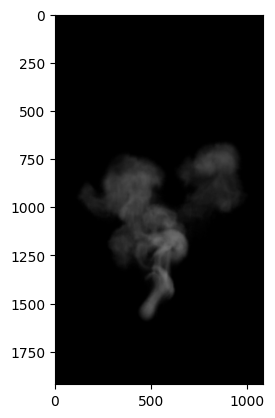

In [21]:
from matplotlib import pyplot as plt
plt.imshow(train_video_data_device[2, 100])

In [3]:
# 3. load poses
camera_infos_path = [
    Path("cam_back.npz"),
    Path("cam_front.npz"),
    Path("cam_right.npz"),
    Path("cam_top.npz"),
]
camera_infos = [np.load(Path("../data/PISG/scene1") / path) for path in camera_infos_path]
cam_transforms = [torch.tensor(info["cam_transform"], dtype=torch.float32) for info in camera_infos]
train_poses_device = torch.stack(cam_transforms)

In [4]:
train_poses_device

tensor([[[-5.3514e-01,  4.1225e-02, -8.4376e-01, -1.1857e+01],
         [ 7.2038e-08,  9.9881e-01,  4.8800e-02,  8.0337e+00],
         [ 8.4477e-01,  2.6115e-02, -5.3450e-01, -9.7147e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],

        [[ 9.9891e-01, -2.2030e-03, -4.6677e-02, -1.7700e-01],
         [ 1.4696e-08,  9.9889e-01, -4.7144e-02,  5.9473e+00],
         [ 4.6729e-02,  4.7092e-02,  9.9780e-01,  1.4836e+01],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],

        [[-2.2557e-02,  5.9413e-02,  9.9798e-01,  1.6746e+01],
         [ 1.3996e-09,  9.9823e-01, -5.9428e-02,  6.3424e+00],
         [-9.9975e-01, -1.3405e-03, -2.2517e-02, -1.1578e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],

        [[ 6.1807e-01, -3.8503e-01,  6.8537e-01,  1.2031e+01],
         [ 7.1458e-09,  8.7184e-01,  4.8979e-01,  1.3291e+01],
         [-7.8612e-01, -3.0273e-01,  5.3886e-01,  7.7081e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00, 

In [5]:
camera_infos[0].files

['cam_transform',
 'focal',
 'aperture',
 'vertical_aperture',
 'near_clip',
 'far_clip']

In [8]:
width = 1080

focal_pixels = torch.tensor(
    [info["focal"] * width / info["aperture"] for info in camera_infos],
    dtype=torch.float32
)
focal_pixels

tensor([1303.6753, 1303.6753, 1303.6753, 1303.6753])

In [11]:
print([info["near_clip"] for info in camera_infos])
print([info["far_clip"] for info in camera_infos])

[array(10.), array(10.), array(10.), array(10.)]
[array(21.6), array(21.6), array(21.6), array(21.6)]
